# 异常值处理
异常值是指那些远离正常值的观测
#### 异常值的检测
    1. 标准差法
    2. 箱型图判别法

# 使用箱型图（Boxplot）判断异常值
箱型图（Boxplot）是一种常用的数据可视化工具，可以直观地识别数据集中的异常值（outliers）。以下是使用箱型图判断异常值的完整方法。

#### 箱型图基本原理
    箱型图由五个关键数值组成：
        下边缘（Lower Whisker）：Q1 - 1.5×IQR
        第一四分位数（Q1）：25%分位数
        中位数（Q2）：50%分位数
        第三四分位数（Q3）：75%分位数
        上边缘（Upper Whisker）：Q3 + 1.5×IQR
        其中IQR（Interquartile Range） = Q3 - Q1
        异常值定义：任何低于下边缘或高于上边缘的数据点

方法1：使用Matplotlib绘制箱型图
#
    plt.boxplot(x, vert=True, patch_artist=False, widths=None, notch=False, showmeans=False, showfliers=True, **kwargs)
    主要参数说明
        参数	        说明
        x	            输入数据(数组或数组序列)
        vert	        方向：True垂直(默认)，False水平
        patch_artist	True填充颜色，False只画边框
        widths	        箱体宽度
        notch	        True显示中位数置信区间缺口
        showmeans	    True显示均值标记
        showfliers	    True显示异常值(默认)
        labels	        分组标签

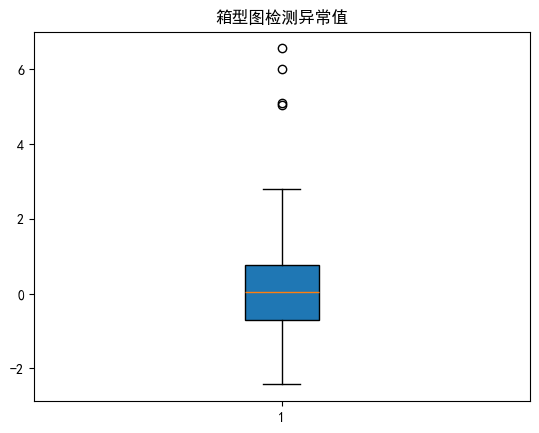

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
data = np.random.randn(100)  # 100个正态分布随机数
data[10:15] += 5  # 添加几个异常值
# 绘制箱型图
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)  #用来正常显示负号
plt.boxplot(data, vert=True, patch_artist=True)
plt.title("箱型图检测异常值")
plt.show()

示例1：简单箱线图

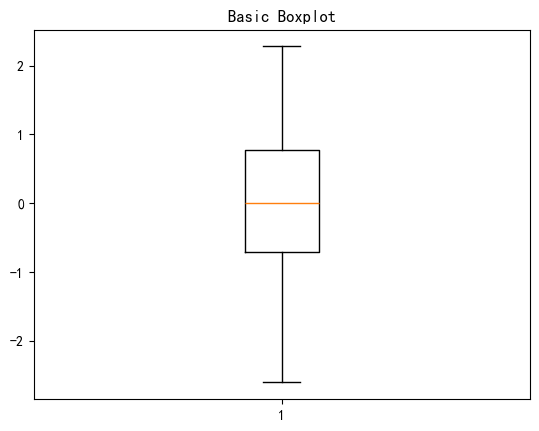

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
data = np.random.normal(0, 1, 100)
# 绘制箱线图
plt.boxplot(data)
plt.title("Basic Boxplot")
plt.show()

示例2：多组数据比较

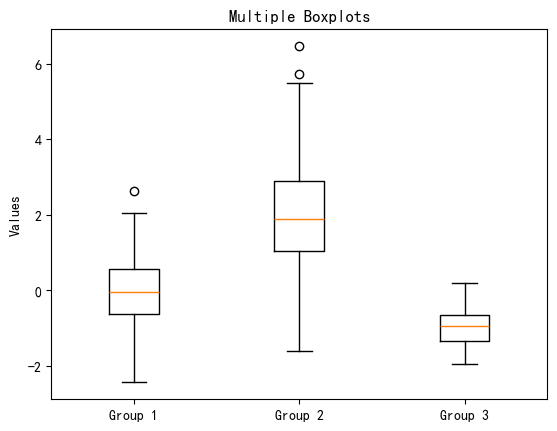

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 生成三组数据
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(2, 1.5, 100)
data3 = np.random.normal(-1, 0.5, 100)
# 绘制多组箱线图
plt.boxplot([data1, data2, data3], 
           tick_labels=['Group 1', 'Group 2', 'Group 3'])
plt.title("Multiple Boxplots")
plt.ylabel("Values")
plt.show()

方法2：使用Seaborn绘制箱型图

seaborn.boxplot() 是基于 Matplotlib 的高级箱线图函数，提供了更美观的默认样式和更简便的 API，特别适合与 Pandas DataFrame 配合使用。
#
    sns.boxplot(data=None, *, x=None, y=None, hue=None, 
           order=None, hue_order=None, orient=None,
           color=None, palette=None, saturation=0.75,
           width=0.8, dodge=True, fliersize=5,
           linewidth=None, whis=1.5, notch=False,
           ax=None, **kwargs)
    主要参数说明
        参数	        说明
        data	        Pandas DataFrame
        x, y	        指定x轴和y轴的变量
        hue	            分组变量(次级分类)
        orient	        方向：'v'垂直(默认)或'h'水平
        palette	        调色板名称或颜色列表
        width	        箱体宽度
        fliersize	    异常值标记大小
        whis	        须线范围(默认1.5×IQR)
        notch	        是否显示中位数置信区间缺口

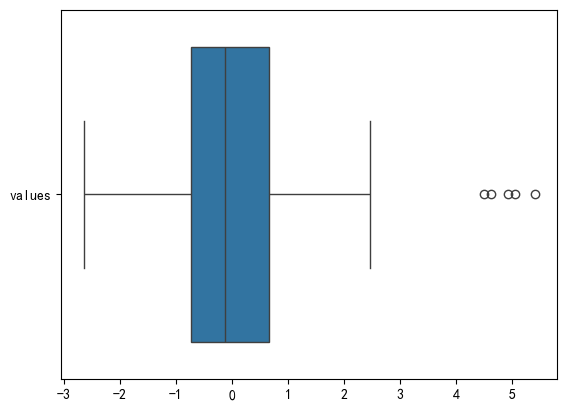

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 生成示例数据
data = np.random.randn(100)  # 100个正态分布随机数
data[10:15] += 5  # 添加几个异常值
df = pd.DataFrame({'values': data})
sns.boxplot(data=df, orient='h')
plt.show()

补充：单变量箱线图

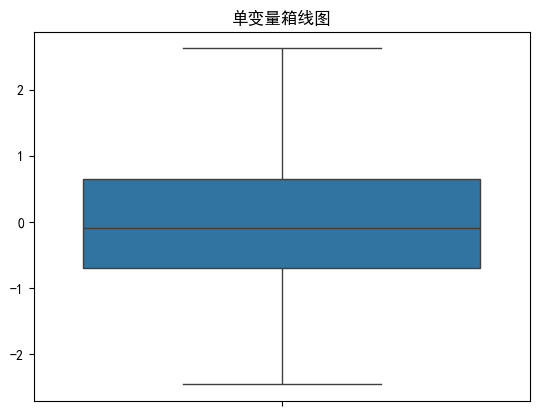

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
data = np.random.normal(0, 1, 100)
# 绘制箱线图
sns.boxplot(data=data)
plt.title("单变量箱线图")
plt.show()

补充：DataFrame多列比较

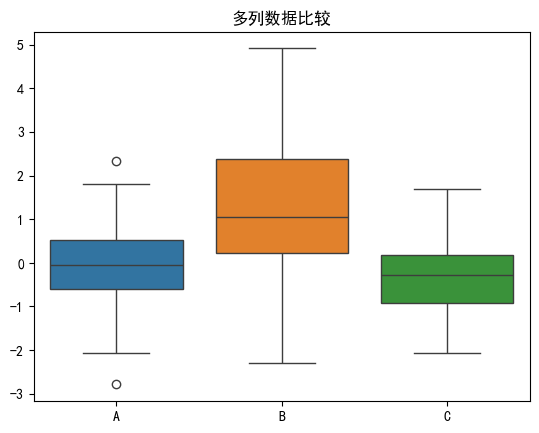

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 创建DataFrame
df = pd.DataFrame({
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(1, 1.5, 100),
    'C': np.random.normal(-0.5, 0.8, 100)
})
# 绘制多列箱线图
sns.boxplot(data=df)
plt.title("多列数据比较")
plt.show()

# 例题

标准差法异常值上限检测: True
标准差法异常值下限检测: False
箱线图法异常值上限检测: True
箱线图法异常值下限检测: False


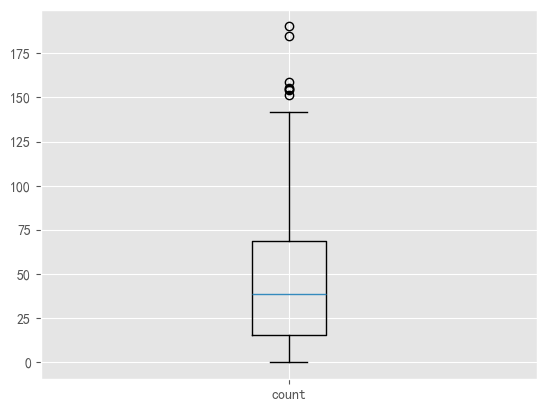

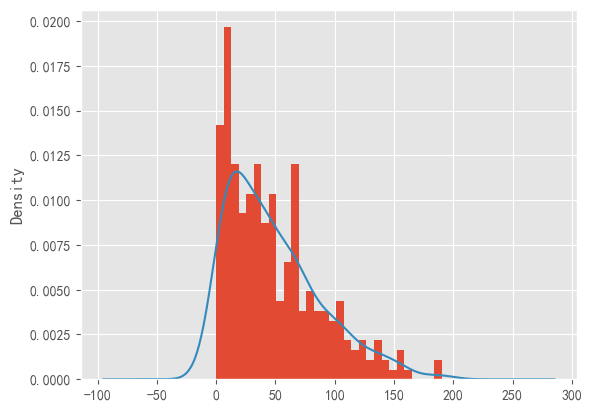

异常值替换前的数据统计特征: count    289.000000
mean      48.613495
std       39.474103
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      190.200000
Name: counts, dtype: float64
判别异常值的上限临界值为: 148.85000000000002
用以替换异常值的数据为: 141.7
异常值替换后的数据统计特征: count    289.000000
mean      48.066090
std       37.918895
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      141.700000
Name: counts, dtype: float64


In [41]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

a = read_csv('sunspots.csv')
# print(a)
#标准差法检测
mu = a.counts.mean()  #计算黑子个数的年平均值
s = a.counts.std()  #计算黑子个数标准差
print('标准差法异常值上限检测:', any(a.counts > mu+2*s))
print('标准差法异常值下限检测:', any(a.counts < mu-2*s))
#箱线图法检测
Q1 = a.counts.quantile(0.25)  #计算下四分位数
Q3 = a.counts.quantile(0.75)  #计算上四分位数
IQR = Q3-Q1
print('箱线图法异常值上限检测:', any(a.counts > Q3+1.5*IQR))
print('箱线图法异常值下限检测:', any(a.counts < Q3-1.5*IQR))
counts_s = a.values[:,1]
# print(counts_s)
#绘制箱型图
plt.boxplot(counts_s, tick_labels=['count'])
plt.show()
#绘制直方图
plt.style.use('ggplot')
a.counts.plot(kind='hist', bins=30, density=True)  #绘制直方图
a.counts.plot(kind='kde')  #绘制核密度曲线
plt.show()

print('异常值替换前的数据统计特征:', a.counts.describe())
UB = Q3+1.5*IQR
st = a.counts[a.counts<UB].max()  #找出低于判别上限的最大值
print('判别异常值的上限临界值为:', UB)
print('用以替换异常值的数据为:', st)
a.loc[a.counts>UB, 'counts'] = st  #替换超过判别上限的异常值  #等价于a.counts[a.counts>UB]
#a.loc[..., 'counts'] - 选择满足条件的 counts 列元素
print('异常值替换后的数据统计特征:', a.counts.describe())